This SageMath will explain how to define variables and functions, evaluate and plot functions, as well as finding derivatives and integrals of symbolic functions(**Calculus way**).

# 1. Free particle wave function


We will use the quantum mechanical wave function of a free particle as an example. Goals:

- Defining functions and variables
- Taking derivatives of a function
- Plot the real and imaginary elements of the free particle wave function $\psi(x,t) = A_0 e^{i(kx - \omega t)}$
- Create an animated plot of the wave function
- Check that the wave function satisfies the Schrodinger's equation
    - Extract solution from a list of answers
    - Solving algebraic equations

Schrodinger's equation for a 1D system (e.g. think of an electron confined to a nanowire) is $\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2} \psi(x,t) +V(x)\psi(x,t) = i\hbar \frac{\partial}{\partial t} \psi(x,t)$.

A free particle is a particle that does not experience any forces along the direction of motion and can move freely without any walls.  In truth there is no such thing as a free particle since all particle are confined in some ways but as long as the dimensions of confinement are much much larger than the wavelength of the particle we can treat the particle as free.  An electron confined to a nanowire with a length on the order of millimeters would be a good example of this.

## Defining variables and functions


- All variables must be explicitly declared (except for the variable 'x' and variables used as arguments of functions) using the **var()** command
- Variables cannot start with numbers or contain spaces but they can contain underscores
- Functions can be evaluated by inserting values for the arguments
- To evaluate an input cell in this worksheet, put the cursor in the cell and hit Shift+Enter.  The output will be displayed in the cell below the input cell.

#### What is the free particle wave function solution to Schrodinger's equation?

The general solution to Schrodinger's equation is $\psi(x,t) = A_0 e^{i(kx-\omega t)} + B_0 e^{i(kx + \omega t)}$ where the only difference between the two terms is the sign in front of $\omega t$, which determines which direction the wave travels.  For the moment we will only look at the first term by setting $B_0=0$.

In [4]:
#This is a calculation input cell.  SageMath will operate on anything typing into this cell and output the results in the cell below.
#Insert the cursor in this cell and hit Shift-Enter to evaluate it.
# Any text after the hashtag is ignored by SageMath

A_0,k,omega, m = var('A_0,k,omega, m')  #Variables are defined using the 'var()' command.

psi(x,t) = A_0*exp(i*(k*x - omega*t))  #This is a how you define a function.  Arguments of the function are placed in parentheses.
psi(x,t) # When a function is defined SageMath does not output the equation.  
s(psi(x,t))

psi(0,0)  #Functions are evaluated by plugging in values for the arguments.  
            # Notice that the wave function at x=0, t=0 has the value of A_0
s(psi(0,0))  #Nicer looking output

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##  Plotting functions

- To replace variables with numerical values you need to use the **.substitute()** command.
    - To replace all values of the variable $A_0$ with the value $1$, append '.substitute(A_0=1)' to the function name.
- The real and imaginary parts of a function can be obtained by using **.real()** and **.imag()**.
- Since SageMath is based on Python, everything is an object.  This means that you can modify properties or act on things using the "dot" notation.

#### What does the free particle wave function look like?

The solution to Schrodinger's equation must be a complex function so the wave function must be split into it's real part and imaginary part to plot the function.  The free particle wave function for a one-dimensional system is $\psi(x,t) = e^{i(kx -\omega t)}$.  What do you think the graph of the real part of the wave function will look like?  What do you think the imaginary part of the wave function will look like?  (Hint: What is Euler's identity?)

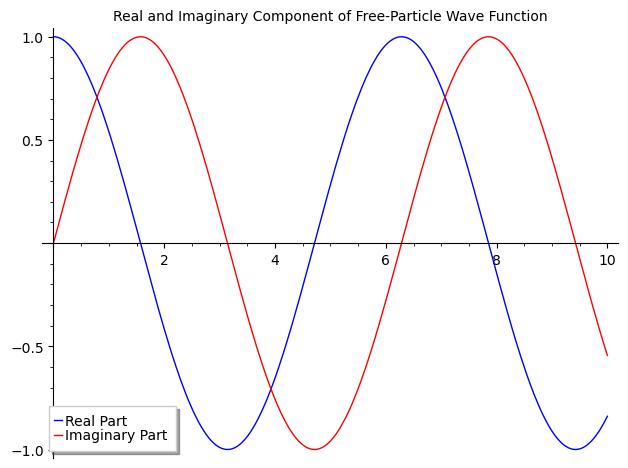

In [5]:
#Plotting the real and imaginary parts of the wave function
psi_plot(x,t) = psi(x,t).substitute(A_0=1,k=1,omega=1)  #Since psi was defined with variable values for A_0, k, and omega, 
                    # we must use the '.substitute()' command to change the variables into numerical values
#psi_plot(x,t) is the same function as psi(x,t) with A_0=1, k=1, and omega=1

psi_plot_Re(x,t)=(psi_plot(x,t)).real()  #The '.real()' command extracts the real component of the function
psi_plot_Im(x,t)=(psi_plot(x,t)).imag() #The '.imag()' command gets the imaginary component

P1=plot(psi_plot_Re(x,0),x,0,10,legend_label='Real Part', title='Real and Imaginary Component of Free-Particle Wave Function')
P2=plot(psi_plot_Im(x,0),x,0,10,legend_label='Imaginary Part',color='red')
P=P1+P2  #Combine the two graphs into one plot
P.show()  #Show the plot

### For You To Try:

Use the fact that $e^{i \theta} = \cos(\theta) + i \sin(\theta)$ to plot the real part of the wave function at time $t = 1$.  Type your work into the input cell below.

How does your graph for the real part of the wave function compare to the graph of the real part above?  What function do you think represents the imaginary part of the free particle wave function?

In [ ]:
#Add your work here

##   Animating plots
- A collection of still images can be combined to create an animation
- Put all images in a list (square brackets denote a list)
- Use the list of images as an argument to the `animage(list_of_images_here)` command

#### Which way is the free particle wave function moving?

To determine the direction that the wave is moving you can create an animated plot at different times using a short Python script.  You will need to create a list of plot snapshots at different times and then combine them into an animation.

In [6]:
times = sxrange(0,5,0.5)     #Create a list of the times for evaluation. sxrange() creates a list of numbers from 0 to 5 in steps of 0.5
plot_graph = []   #Create an empty list to store the plotted graphs at different times

for t in times:    #Loop through all times
    new_plot=plot(psi_plot_Re(x,t),x,0,10)+plot(psi_plot_Im(x,t),x,0,10,color='red')   #Create plot at time t for each value of t
    plot_graph.append(new_plot)  # rgba(170, 221, 221, 1) the new plot to the final list

a=animate(plot_graph)    #Combine all plots contained in plot_graph into an animation
show(a)  #Show the animation

/home/tom/miniconda3/envs/sage/lib/python3.12/site-packages/sage/repl/rich_output/display_manager.py:594: RichReprWarning: Exception in _rich_repr_ while displaying object: Error: Neither ImageMagick nor ffmpeg appear to be installed. Saving an animation to a GIF file or displaying an animation requires one of these packages, so please install one of them and try again. See www.imagemagick.org and www.ffmpeg.org for more information.
  warnings.warn(


Animation with 10 frames

In [7]:
plot_graph = [plot(psi_plot_Re(x,t),x,0,10)+plot(psi_plot_Im(x,t),x,0,10,color='red') for t in sxrange(0,5,.5)]
a=animate(plot_graph)
a.show()

Animation with 10 frames


### Note:

You can accomplish the same thing with more compact code using Python list comprehensions:

    plot_graph = [plot(psi_plot_Re(x,t),x,0,10)+plot(psi_plot_Im(x,t),x,0,10,color='red') for t in sxrange(0,5,.5)]
    a=animate(plot_graph)
    a.show()

##   Working with complex functions



- Assumptions about variables can be specified using the **assume()** command.  In this case we assume all variables are real.
- The complex conjugate can be found using **.conjugate()**.
- **print()** and **s()** can be used to include text in an output cell.

#### Calculate the probability density for the free particle wave function

The wave function $\psi(x,t)$ is called the probability amplitude of the particle.  The probility density $\rho(x,t)$ is equal to the magnitude of the probability amplitude squared.  Since $\psi(x,t)$ is complex, the magnitude squared _is not the same as_ the square of $\psi(x,t)$.  You must multiply $\psi(x,t)$ by it's complex conjugate, which is written as $\psi^*(x,t)$.  The probability density is then given by $\rho(x,t) = \psi^*(x,t) \psi(x,t)$.

How would you find the probability to find a particle between two points given the probability density?  In other words, how is the probability density related to the probability to find the particle within some region of space?

In [9]:
#All of these quantities are real.  to specify they are real because we will calculate the complex conjugate of psi(x,t)
#Without assumption that these variables are real, rho(x,t) below will not simplify to A_0^2
var('omega k x t A_0')
assume(omega,'real')
assume(k,'real')
assume(x,'real')
assume(t,'real')
assume(A_0,'real')

rho(x,t)=psi(x,t)*psi(x,t).conjugate() #When defining a function, the results are not printed out ...
rho(x,t)  #... so you'll need to call the function to get SageMath to print it in the output cell

print('The probability density rho(x,t) for a free partile is', rho(x,t))

#You can typeset the print statement using Latex by calling 's()'...
s('The probability density $\\rho(x,t)$ for a free particle is', rho(x,t))

#Notice that print only requires quote marks around text while s() uses parentheses and quote marks

The probability density rho(x,t) for a free partile is A_0^2


<IPython.core.display.Math object>

### For You To Try:

- To see what other assumptions you can make, type 'assume?' into the input cell below.
- To get help with the **integral()** command, first type 'int' and then hit Tab to use autocomplete.  Select 'integral' from the pop-up list and add a question mark to the end before evaluating the cell by hitting Shift+Enter

In [ ]:
#Input your work here

##  Taking derivatives of functions

- The command **.derivative()** will find the derivative of a symbolic function.
- The arguments of the **.derivative()** command are the variable of differentiation and the order of the derivative
    - To find the third derivative of the function $f$ with respect to $x$ use:

           f.derivative(x, 3)

The output from the **.derivative()** command is another function, which you can evaluate or set equal to another variable.

In [ ]:
psi.derivative(x,1)  #Taking the first derivative with respect to x
psi.derivative(x)  #First order derivative is assumed if no number is given
psi.derivative()  #If you don't specify the differentiation variable, SageMath will return a list with all possible derivatives

psi(x,t).derivative(x)  #If you explicitly include the arguments of the function the result will be returned without (x,t) |-->


psi.derivative(x)(x=1,t=1)  #You can evaluate the derivative at a point but specifying the values for x and t...

psi_prime = psi.derivative(x)   #... or you can define your result as a new function...
psi_prime(1,1)    #... and evaluate this new function at the point x=1, t=1


### Note:

Rather than using the "dot" notation, you can treat the **derivative()** command as a function.  You can also use **diff()** in place of **derivative**; the results are the same for both commands.

- Here are a couple of examples that are all equivalent:

      derivative(f,x,2)

      diff(f,x,2)

      f.derivative(x,2)

      f.diff(x,2)

##   Defining functionals involved derivatives

Another way to define functions is using Python commands.
- Definition must start with **def** followed by the name of the function and the arguments of the function.
- First line of function definition must end with a colon **:**
- All code included in the function must be indented four spaces (one tab)
- Last line of function defintion must return resulting equation

#### Momentum Operator

In quantum mechanics, all observable quantities have an associated operator.  These operators require a wave function to operate on.  The momentum operator in one-dimension is defined as $\hat{p}=-i\hbar \frac{d}{dx}$.  The value of the momentum $p$ is found by applying the operator to the wave function.  In other words, $p\psi(x,t) = \hat{p} \psi(x,t)$ or, dividing both sides by $\psi(x,t)$, $p=\frac{\hat{p}\psi(x,t)}{\psi(x,t)}.$  Notice that $\psi(x,t)$ doesn't cancel out the $\psi(x,t)$ in the numerator because the numerator is $\hat{p}$ *operating* on $\psi(x,t)$ which is different than multiplying the two terms together.

The momentum of a free particle is given by $\hbar k$, which is what the following calculation demonstrates.

In [ ]:
hbar=var('hbar',latex_name=r'\hbar')  #This extra defintion will display the hbar symbol when using .show()

def P(f):   #This will define the momentum operator P
    return -i*hbar*diff(f,x)    #The function returns -i*hbar*diff(f,x) when called

P(psi)  #Calculating momentum using P-operator.  Notice psi indicate P is operating on the function
P(psi).show()  
P(psi(x,t)).show()  # if I explicitly include the arguments of psi that (x,t) |--> is not included in the output

momentum = P(psi(x,t))/psi(x,t)
s('The momentum of a free particle is $p=$', momentum)

### For You To Try:

Schrodinger's equation is given by $\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2} \psi(x,t) +V(x)\psi(x,t) = i\hbar \frac{\partial}{\partial t} \psi(x,t).$  In order to demonstrate that $\psi(x,t) = A_0 e^{i(kx - \omega t)}$ satisfies this equation, you need to plug this equation for $\psi(x,t)$ into both sides of the equation and show both sides are equal to one another.

First, take the second derivative of the wave function $\psi(x,t)$ with respect to $x$ in the cell below.  Multiply this by $-\hbar^2/(2m)$.  This will give you the left-hand side of Schrodinger's equation.

Next find the first derivative of $\psi(x,t)$ with respect to $t$.  Multiply this result by $i \hbar$ to get the right-hand side of Schrodinger's equation.   Compare this equation to the previous equation.  The two equations should agree if you recognize that $\omega = \hbar k^2/(2m)$.

Use **.substitute(omega = hbar k^2/(2*M))** on this second equation and both equations should match, showing that this wave function satisfies Schrodinger's equation.

In [ ]:
#Insert your work here

## Another exampe of defining functionals involving derivatives

We will use the Python **def** command again to define our two functions.   To define the Hamiltonian operator $\hat{H} = \frac{-\hbar^2}{2m} \frac{d^2}{dx^2} $ we would use a Python definition that returns the desired function.  We can define the energy operator $\hat{E} = -i \hbar \frac{d}{dt}$ in a similar fashion.  These two functions can then be used to find $\hat{H}\psi(x,t)$ and $\hat{E}\psi(x,t)$

#### Defining Schrodinger's equation in SageMath

The left-hand side of Schrodinger's equation is called the Hamiltonian which you may have heard of in a classical physics course.  The Hamiltonian $\hat{H}$ and energy $\hat{E}$ are operators which must have a function to operate on.  In this worksheet we use the hat symbol $\hat{}$ above the letter to indicate an operator but your instructor may use different notation.  The operator $\hat{H}$ is called 'H-hat'.

In terms of operators, Schrodinger's equation can be written as $\hat{H}\psi(x,t) = \hat{E} \psi(x,t)$ where we understand that $\hat{H}$ and $\hat{E}$ operator on the functions immediately to their right.

In [ ]:
hbar=var('hbar',latex_name=r'\hbar')  #This defintion will display the hbar symbol when using .show() or s

def H(f):    #The first line of the definition must include the name of the function, the variables, and end with a colon
    return -hbar^2/(2*m)*diff(f,x,2)   #all lines that make up the function must be indented four spaces (one tab)

def E(f):   #This function is the right-hand side of Schrodinger's equation
    return i*hbar*diff(f,t)

Hamil_term=H(psi(x,t))   #Calculate the Hamiltonian operating on psi
Ener_term=E(psi(x,t))    #Calculate the energy operator on psi

Hamil_term.show()    #Show pretty versions of H(psi)
Ener_term.show()     #Show a pretty version of E(psi)

## Solving algebraic equations

- When solving equations you must remember the difference between $==$ and $=$.
    - The 'double-equals' sign $==$ is a comparison and is what you should use with the **solve()** command.
    - The "single-equals' sign $=$ is an assignment operator and sets the left hand side to the value on the right.
- The arguments of **solve()** are the equation to solve and the variable to solve for.
- Type **solve?** into an input cell to see the other options available for the **solve()** command.

#### Find the values of $k$ that satisfy Schrodinger's equation

We've already specified the equation that relates $k$ and $\omega$ but the following will show you how to use SageMath to find this relation using Schrodinger's equation.  We'll use the previous definitions of $H$ and $E$ along with $\psi(x,t)$ to find $k$.

In [ ]:
ans = solve(H(psi(x,t))==E(psi(x,t)),k)
show(ans)

print("Here are two other examples using the solve command")
ans2 = solve(cos(k*x)==0,x)
s("The solution to $cos(k*x)=0$ is ", ans2 )  #This only gives one answer.  This equation holds true for *any* integer multiple of this answer.

ans3 = solve(x^2+x==6,x)
s("The solutions to x^2+x = 6 are ",ans3)

### For You To Try:

Solve the equation $H \psi(x,t) == E \psi(x,t)$ for **omega** rather than **k** and show the result is $\omega = \frac{\hbar^2 k^2}{2m}$.

In [ ]:
#Insert your work here

## Extract a solution from a list of answers


- The solution from the **solve()** command is a Python list and we can extract elements of the equations from the list.  Python starts indices at 0 rather than 1 so the first element in *ans* is *ans[0]* and the second element is *ans[1]*.
- You can extract the **r**ight **h**and **s**ide of an equation using **.rhs()**.
- To see if the equation holds true we need to compare the two sides using a double equals sign (==) and force SageMath to give us a Boolean answer by using **bool()**.

#### Double-check that $k$ satisfies the wave equation

To help practice using SageMath, we will take the solution obtained for $k$ and plug it back into Schrodinger's equation (again).

In [ ]:
ans[0].show()  #Extract first equation from list of solutions
ans[1].show()  #Extract second equation from list of solutions

k1 = ans[0].rhs()   #Extract right-hand side of first solution...
k1.show()   #... and show the typeset version

k2 = ans[1].rhs()   #Extract right-hand side of second solution...
k2.show()        #... and make it look nice


t_or_f1=bool(H(psi(x,t).substitute(k=k1))==E(psi(x,t).substitute(k=k1)))   #Check if the two equations are equal for solution k1...
s("$k_1$ satisfies the Schrodinger equation:", t_or_f1)    #... and print the results


t_or_f2=bool(H(psi(x,t).substitute(k=k2))==E(psi(x,t).substitute(k=k2)))   #Check if the two equations are equal for solution k2...
s("$k_2$ satisfies the Schrodinger equation:", t_or_f2)    #... and print the results

##   Integrating a function



- The command to integrate is **.integrate()** or you can apply **integrate()** as a function to the equation.
- For an indefinite integral you only need to specify the variable of integration
- For a definite integral you must specify the variable of integration and the limits.
     - For example, to integrate the function $f(x)$ from $x=0$ to $x=L$ you'd type:
             integrate(f(x),[x,0,L])


### Normalize the wave function and find the probability to find the free particle between to points in space

To normalize the wave function, the total probability to find the particle _somewhere_ must equal 1.  Unfortunately with the free particle you run into an issue because the free particle can be anywhere between $-\infty$ and $\infty$.  Using these limits results in a divergent integral.  To get around the infinite integral we will consider the case where the particle is limited to some region between $x=+L$ and $x=-L$ where $L \gg \lambda$ where $\lambda$ is the wavelength of the free particle.

In [ ]:
norm_integral_1 = integrate(psi*psi.conjugate(),x); norm_integral_1   #Set the value of the indefnite integral = norm1, and display norm1
solve(norm_integral_1 ==1,A_0)  #Solve for the values of A_0

L=var('L')  #Define L as a variable
assume(L,'real')  #Specify that L is a real quantity
norm_integral_2 = integrate(psi*psi.conjugate(),[x,-L,L]);norm_integral_2  #Solve definite int using -L & L as the lower & upper bounds
norm_const=solve(norm_integral_2==1,A_0);norm_const  #Solve for A_0
show("If the particle is confined to a region of length 2L, the normalization constant $A_0$ is ", norm_const[1].rhs() )

show("The wave function $\psi(x,t)$, including the normalization constant is $psi(x,t)=$", psi(x,t).substitute(A_0=norm_const[1].rhs()))

## Other ways to do things

In addition to using the "dot" notation to operate on functions, you can also use various operations as functions.  For instance, *derivative(psi,x)* gives the same result as *psi.derivative(x)*

In [ ]:
psi.derivative(x,2)
derivative(psi,x,2)

psi.integrate(x)
integrate(psi,x)

psi.real()
real(psi)

psi.imag()
imag(psi)

psi.show()
show(psi)

## Project Ideas and Problems to Solve

1. Have students find realistic values for masses and velocities for electrons, protons, or neutrons and use de Broglie's equation to find $k$, $\omega$, and total energy $E$.

2. Plot wave functions for electrons and protons on the same plot and have students explain why electron microscopes are used for imaging small objects while 'proton microscopes' aren't as useful.

3. Have students complete homework problems from the end of the textbook chapter.

# 2. Particle in 1D box - Solving differential equations



- Solving DEs
- Integrating a function
- Plotting functions
- Creating an animated plot
- Approximate numerical results
- Expand symbolic expressions

When solving DEs it helps to specify which variables are real and which are positive using the **assume()** command.
- You need to specify the independent variable (**IV**) of your function.  In this case we specify that $\psi$ is a function of $x$.
- The DE is defined using the Python **def** method.
    - This creates a function which we can differential, integrate, or use **desolve()**.
    - **desolve()** includes the DE to solve, the dependent variable ($\psi$ in this case), and the IV x (specified using **ivar=x** to indicate IV).

### Find general solution to Schrodinger's equation

The time-independent Schrodinger's equation in one dimension is $\frac{-\hbar^2}{2m} \frac{d^2}{dx^2}\psi(x) + V(x)\psi(x) = E \psi(x)$.  For an infinite square well of width $L$ the potential energy function is given by

$V(x) = \left\{ \begin{array}{cc} \infty & \text{if } x\ge L\\ 0 & \text{if } 0< x < L \\ \infty & \text{if } x \le 0 \end{array}\right.$


Note: To solve this differential equation we set the potential energy to zero inside the box and rearrange Schrodinger's equation so it has the form $\frac{-\hbar^2}{2m} \frac{d^2}{dx^2}\psi(x) - E \psi(x) = 0$.

In [ ]:
psi,m,L=var('psi,m,L')  #Declare wave function, mass, and box length as variables

Ener=var('Ener',latex_name=r'\mathcal{E}')  #Declare Ener as energy variable but will display a script E when using show() 
hbar=var('hbar',latex_name=r'\hbar')  #Declares hbar as a variable and displays hbar symbol when using show() 

assume(Ener,'real')   #Assume the variable Ener (the energy) only takes real values...
assume(Ener>0)        #... and assume the energy is greater than zero.  These are needed for desolve()

assume(m,'real')   #Assume the mass is real...
assume(m>0)        #... and positive.  
              #If you don't make assumptions you will get an error message asking if these variables are positive, negative, or zero

#To solve DE, we must tell Sage that psi is a function called 'psi' with a single dependent variable
psi=function('psi')(x)   

def f(psi):  #Define the equation to solve.
    return -hbar^2/(2*m)*diff(psi,x,2)-Ener*psi   #This is the differential equation to be solved

general_soln = desolve(f(psi)==0,psi,ivar=x)


s('The general solution to Schrodinger\'s equation is $\psi(x)=$', general_soln)


### Satisfying boundary conditions

The boundary conditions require that $\psi(x,t)$ must be zero at the two walls.  In other words, $\psi(x=0,t)=0$ and $\psi(x=L,t)=0$.  Since $\sin(0)=0$ and $\cos(0)=1$, this means that $K_2=0$.  The boundary condition at $x=L$ says that $K_1 \sin(\sqrt{2 \mathcal{E} m} x/\hbar) = 0$ which is true if the argument of $\sin()$ is an integer multiple of $\pi$.  Thus $\frac{\sqrt{2 m \mathcal{E}}L}{\hbar} = n \pi$ for $n = 1, 2, 3, ...$.  To be consistent with previous notation we will set $A_0 = K_1$.  The wave function for the particle in a box is $\psi(x,t) = A_0 \sin(\frac{n \pi x}{L}).$


## Integrating functions

- To integrate the function **f(x)** you can either use **f(x).integrate(x)** or **integrate(f(x),x)**.
- For a definite integral, instead of just specifying the integration variable **x** you should specify the variable *and* the limits **[x,0,L]**.
- Integrals frequently gives errors asking if a quantity is positive, negative, or zero.  Use **assume()** commands to resolve this question.



### Deterimine normalization constant

The integral of the probability density over some region of space gives the probability of finding the particle in that region.  If we integrate over all possible places the particle might be, the total probability has to be 1 ( which corresponds to 100%).  We can use this fact to find the normalization constant $A_0$.  In other words, by requiring $\int_0^L \psi^*(x,t) \psi(x,t) dx = 1$ we can solve for $A_0$.

In [ ]:
A_0,n =var('A_0,n ')
assume(L,'real')  #Assume L is a real number
assume(L>0)  #Assume L is positive
assume(n,'integer')   #n must be an integer for a particle in an infinite square well - this is why we have quantization


psi_well(x,n)=A_0*sin(n*pi*x/L)   #Define the wave function

norm_int=integrate(psi_well*psi_well.conjugate(),[x,0,L])   #Integrate the probability density (psi* x psi) over the width of the well
s('The normalization integral gives ', norm_int)

answer=solve(norm_int==1,A_0)   #What value does A_0 need to have for a total probability of 1
s('The possible answers for $A_0$ are ', answer)

norm_const=answer[1].rhs()   #Select only the right hand side of the last term
s('We are only interested in the positive value  which is $A_0=$', norm_const)

psi_well(x,n)=psi_well(x,n).substitute(A_0=norm_const)  #Substitute our value for A_0 into the wave function
show('The equation for our wave function inside an infinite potential well is $\psi(x)=$', psi_well(x,n))

## More integration examples

### Check orthogonality of infinite square well solutions

The wave functions for differing values of $n$ should be orthogonal to one another.  This means that $\int_0^L \psi_n^*(x) \psi_m(x) dx = \delta_{mn}$

In [ ]:
m=var('m')
assume(m,'integer')

probability_not_orthogonal=integrate(psi_well(x,n).conjugate()*psi_well(x,n),[x,0,L])  #Calculate for m=n
show(' If both wave functions have same n-value, then $\int_0^a\psi_n^*(x) \psi_n(x)dx$ = ', probability_not_orthogonal)


probability_orthogonal=integrate(psi_well(x,n).conjugate()*psi_well(x,m),[x,0,L])   #Calculate for m not equal to n
show(' If m is not equal to n, then $\int_0^a\psi_n^*(x) \psi_m(x)dx$ = ', probability_orthogonal)  #%todo: \ne or \neq not working


## 2D plots of functions

- To plot a function $f(x)$ vs. $x$ from $x=0$ to $x=2$, use **plot(f(x),[x,0,2])**
- You can change the color of the line plotted by setting the color argument (e.g. **color='black'**)
- Multiple graphs can be combined into a single plot window by adding the **plot()** commands together.
- Plots have various properties, such as line color, type of line, points plotted, titles, and axes labels that can be changed
- Use the **show()** command to display a plot
- When plotting functions with unspecified variables, set all variables to 1 using **.substitute()**.

### Plot wave function and probabilty density

The following commands demonstrate how to plot the wave function and probability densities for the first three lowest energy states of the 1D particle-in-a-box.

Since the potential energy (and thus the Hamiltonian) is symmetric about the center of the well (about the point $x=L/2$), the wave functions will either be symmetric or antisymmetric about $x=L/2$.  Since we haven't specified the length of the box we will set $L=1$ for purposes of plotting.

In [ ]:
psi_well_1(x)=psi_well(x,1).substitute(L=1)  #n = 1 ground state with L=1
psi_well_2(x)=psi_well(x,2).substitute(L=1)  #n = 2 first excited state with L=1
psi_well_3(x)=psi_well(x,3).substitute(L=1)  #n=3 second excited state with L=1

#The following three lines create plots of psi vs x
P1=plot(psi_well_1(x),[x,0,1],color='red',legend_label='n=1 State',title='First three wave functions of infinite well',axes_labels=['Position x','$\psi(x)$'])
P2=plot(psi_well_2(x),[x,0,1],color='blue',legend_label='n=2 State')
P3=plot(psi_well_3(x),[x,0,1],color='green',legend_label='n=3 State')


P=P1+P2+P3  #Combine graphs of first three states into a single object called 'P'...
P.show()  #... and display P on the screen

#The following three lines create plots of the probability density (psi*)psi vs x
P4=plot(psi_well_1(x)*psi_well_1(x).conjugate(),[x,0,1],color='red',legend_label='n=1 State',title='Probability density of first three states of infinite well',axes_labels=['Position x','|$\psi(x)|^2$'])
P5=plot(psi_well_2(x)*psi_well_2(x).conjugate(),[x,0,1],color='blue',legend_label='n=2 State')
P6=plot(psi_well_3(x)*psi_well_3(x).conjugate(),[x,0,1],color='green',legend_label='n=3 State')


PB=P4+P5+P6 #Combine the three graphs of probability density...
PB.show()   #...and show them on the screen


## For You To Try:

How does the number of peaks of the wave function compare to the value of n?
How does the number of nodes of the wave function compare to the value of n?
To help answer this question, plot the wave functions for the n=4 and n=5 states and see if they agree with your answer to these two questions.  You can use psi_well(x,n) to define your wave functions.

In [ ]:
#Insert your work here

## Another example of integration
- SageMath will leave answers in exact form (e.g. 1/4 or pi) so to get numerical approximations you must use **.n()**
- You can specify how many digits are returned using **.n(digits=3)**

### Probabilities to find the particle

The probability to find a particle between $x=a$ and $x=b$ is found by integrating the probability density over the region: $\int_a^b \psi^*(x) \psi(x) dx $

What is the probability to find the particle somewhere in the box?


What is the probability of finding the particle in the left half of the box (between $x=0$ and $x=L/2$)?


What is the probability of finding the particle in the left quarter of the box (between $x=0$ and $x=L/4$)?

In [ ]:
probability_somewhere=integrate(psi_well(x,1).conjugate()*psi_well(x,1),[x,0,L])

s("The probablity to find the particle somewhere is ", probability_somewhere)

probability_left_half=integrate(psi_well(x,1).conjugate()*psi_well(x,1),[x,0,L/2])

s("The probability to find the particle in the left half of the box between $x=0$ and $x=L/2$ is ", probability_left_half)

probability_left_quarter=integrate(psi_well(x,1).conjugate()*psi_well(x,1),[x,0,L/4])

show("The probability to find the particle in the left quarter of the box between $x=0$ and $x=L/4$ is ", probability_left_quarter, " = ", probability_left_quarter.n(digits=2) )


## For You To Try:

How do you think these three probabilities would differ for the $n=2$ state?

Calculate the probability for the particle to be somewhere inside the well, in the left half of the well, and in the left quarter of the well for the $n=2$ state.  Compare these results to the answers for the $n=1$ state.

In [ ]:
#Insert your work here


## Expanding symbolic answers and obtaining numerical results

### Calculating expectation values

- `.expand()` will distribute terms and expand powers in a symbolic expression
    - Note: When using `.expand()` on an express (rather than a variable), it helps to put parenthese around the expression.
        - This won't work `3*(x+y).expand()` but `(3*(x+y)).expand()` will work.
- SageMath keeps results in exact form (e.g. $\sin(\pi/4)$ rather than $0.707$) but you can force SageMath to give an approximate answer using `.n()`
    - You can specify the number of digits the approximate result should have using `.n(digits=3)`

What is the expected value of the position of the particle $<x>$?

In [ ]:
x_exp=integrate(psi_well(x,1).conjugate()*x*psi_well(x,1),[x,0,L]);x_exp  #Expecatation value of position <x>

x_exp.expand()  #Simplify the result by multiplying terms together

x_numeric=x_exp.substitute(L=1E-9)   #Set size of box to 1 nm
x_numeric.n()   #Force SageMath to compute numerical result
x_numeric.n(digits=3)   #You can specify the number of significant figures
pi.n(digits=7)   #Pi to seven places

def P(f):   #Definition of momentum operator
    return -i*hbar*diff(f,x)


p_exp=integrate(psi_well(x,1).conjugate()*P(psi_well(x,1)),[x,0,L])  #Expectation value of momentum <p>
p_exp

K_exp=integrate(psi_well(x,1).conjugate()*P(P(psi_well(x,1)))/(2*m),[x,0,L])  #Expectation value of kinetic energy <K>=<p^2>/2m
K_exp.show()


### Time-dependent behavior of the wave function and probability densities

In [ ]:
psi_plot_1(x,t)=psi_well_1(x)*e^(i*pi^2/2*t)


plot_graph = [plot(psi_plot_1(x,t).real(),[x,0,1],color='red',ymin=-1.5,ymax=1.5) for t in sxrange(0,2,.1)]
a=animate(plot_graph)
a.show()

In [ ]:
plot_graph_b = [plot(real(psi_plot_1(x,t)*psi_plot_1(x,t).conjugate()),[x,0,1],color='red',ymin=-2,ymax=2) for t in sxrange(0,2,.1)]
b=animate(plot_graph_b)
b.show()


## For You To Try:

Why does the wave function oscillate but the probability density does not?  (Hint: the probability density involves multiplying the wave function by its complex conjugate)

Plot the wave function and probability density for the n=2 state and see if it displays the same behavior.

In [ ]:
#Insert your work here


### Animate plot of superposition of two states

In [ ]:
psi_super(x,t)=psi_well_1(x)*e^(i*pi^2/2*t)+psi_well_2(x)*e^(i*4*pi^2/2*t)

plot_graph_c = [plot(psi_super(x,t).real(),[x,0,1],color='red',ymin=-2.5,ymax=2.5) for t in sxrange(0,2,.1)]
c=animate(plot_graph_c)
c.show()

In [ ]:
plot_graph_d = [plot(real(psi_super(x,t)*psi_super(x,t).conjugate()),[x,0,1],color='red',ymin=0,ymax=6.5) for t in sxrange(0,2,.1)]
d=animate(plot_graph_d)
d.show()


## For You To Try:

Why does the probability density of the superposition state vary with time while the pure n=1 and n=2 states do not vary (Hint: The time dependence of the wave function is contained in the term $e^{iE_n t/\hbar}$.  What happens to this time dependence when you calculate $\psi^* \psi$ for the pure n=1 state or n=2 state? )

Plot the real part of a superposition of the n=1 and n=3 states $\psi_{super}(x,t)=\psi_{n=1}(x,t)+\psi_{n=3}(x,t)$.  Remember that the time dependency is $e^{iE_n t/\hbar}$ where $E_n=\frac{n^2\pi^2\hbar^2}{2mL^2}$ where we have assumed $\hbar=1$, $m=1$, and $L=1$ for plotting purposes.

In [ ]:
#Insert your work here

##   Project Ideas and Problems to Solve

1. Normalize a 50/50 superposition of the n=1 and n=3 state where $\psi_{super}(x,t)=A_{norm}\left( \psi_{n=1}(x,t)+\psi_{n=3}(x,t)\right)$.  In other words, find the value of $A_{norm}$ such that $\int_{-\infty}^{\infty}\psi^*(x,0) \psi(x,0) dx = 1$.

2. Calculate <x> for a particle in a superposition of the n=1 and n=3 states $\psi_{super}(x,t)=\psi_{n=1}(x,t)+\psi_{n=3}(x,t)$.

3. Use the fact that the uncertainty of an observable is defined as $\Delta A = \sqrt{< A^2 > - < A >^2}$ to find the uncertainty in the position and momentum for the first three states.

4. Repeat the previous question for the superposition of the n=1 and n=3 states.

# 3. Q harmonic oscillator - Solving DEs


- Solving differential equations
- Plot dotted, dashed, or solid lines
- Placement of plot titles
- Adding arrows and text to plots
- Simplify symbolic expressions

Physicists LOVE the harmonic oscillator potential.  It is one of our favorites for two very important reasons: 1) It is one of handful of potentials that we can solve exactly and 2) _any_ restoring force potential can be approximated as a harmonic oscillator near the equilibrium point.  This is why we often approximate solid matter as a collection of ball-and-springs; the molecular bonds between atoms behave like springs if you don't compress the solid too much.

The harmonic potential energy equation is $U=\frac{1}{2}m \omega^2 x^2$.  Plugging this into Schrodinger's equation gives

$\frac{-\hbar^2}{2m} \frac{d^2}{dx^2}\psi(x) + \frac{1}{2}m \omega^2 x^2 \psi(x) = E \psi(x)$


- When solving differential equations it helps to specify which variables are real and which are positive using the `assume()` command.
- You need to specify the independent variable of your function.  In this case we specify that $\psi$ is a function of $x$.
- The differential equation is defined using the Python `def` method.
    - This creates a function which we can differential, integrate, or solve using the differential equation solver.
- Use `desolve()` to solve the differential equation.  The arguments of `desolve()` are the differential equation to solve, the dependent variable ($\psi$ in this case), and the independent variable x (specified using `ivar=x` to indicate the independent variable).  In this case, `desolve()` with encounter an issue unless you specify `contrib_ode=True`, in which case a slightly different solver is used to handle the differential equation.

In [ ]:
psi,m,L,omega=var('psi,m,L,omega')  #Declare wave function, mass, and box length as variables

Ener=var('Ener',latex_name=r'\mathcal{E}')  #Declare Ener as energy variable but will display a script E when using show()  
hbar=var('hbar',latex_name=r'\hbar')  #Declares hbar as a variable and displays hbar symbol when using show()  

assume(Ener,'real')   #Assume the variable Ener (the energy) only takes real values...
assume(Ener>0)   #... and assume the energy is greater than zero.  These are needed for desolve()

assume(m,'real')   #Assume the mass is real...
assume(m>0)     #... and positive.   

#To solve the differential equation we must tell SageMath that psi is a function called 'psi' with a single dependent variable
psi=function('psi')(x)   

def f(psi):  #Define the equation to solve.
    return -hbar^2/(2*m)*diff(psi,x,2)+(1/2*m*omega^2*x^2-Ener)*psi   #This is the differential equation to be solved

general_soln = desolve(f(psi)==0,psi,ivar=x,contrib_ode=True)   #


s('The general solution to Schrodinger\'s equation is ', general_soln[0])


The Kummer functions are [confluent hypergeometric functions](https://en.wikipedia.org/wiki/Confluent_hypergeometric_function).  At present SageMath cannot evaluate these functions so I'll enter the first few wave functions for you manually below.

In [ ]:
#Harmonic Oscillator Wavefunction and energy
m,omega=var('m,omega')
hbar=var('hbar',latex_name=r'\hbar')                                  #Declares hbar as a variable and displays hbar symbol 
alpha=m*omega/hbar         #If alpha is defined after the wave functions are defined, you need to use .substitute(alpha=m*omega/hbar)

psi_HO0(x) = (alpha/pi)^(1/4)*e^(-alpha*x^2/2)                        #n=0 state of 1D harmonic oscillator
psi_HO1(x) = (4*alpha^3/pi)^(1/4)*x*e^(-alpha*x^2/2)                  #n=1 state of 1D harmonic oscillator
psi_HO2(x) = (alpha/(4*pi))^(1/4)*(2*alpha*x^2-1)*e^(-alpha*x^2/2)    #n=2 state of 1D harmonic oscillator
psi_HO3(x) = (alpha^3/(9*pi))^(1/4)*(2*alpha*x^3-3*x)*e^(-alpha*x^2/2)#n=3 state of 1D harmonic oscillator
psi_HO4(x) = (alpha/(36*pi))^(1/4)*(2*alpha^2*x^4-6*alpha*x^2+3/2)*e^(-alpha*x^2/2)  #n=4 state of 1D harmonic oscillator
psi_HO5(x) = (alpha/(225*pi))^(1/4)*(2*alpha^(5/2)*x^5-10*alpha^(3/2)*x^3+15*alpha^(1/2)*x/2)*e^(-alpha*x^2/2)  #n=5 state  

def E_n(n,omega):                                                     #1D harmonic oscillator energy function
    return (n+1/2)*hbar*omega

def H(psi):                                                           #1D harmonic oscillator Hamiltonian
    return -hbar^2/(2*m)*diff(psi,x,2)+1/2*m*omega^2*x^2*psi


In general, the quantum harmonic oscillator wave function can be found from the following relationships:

$\psi_n(x) = \left( \frac{1}{2^n n!} \right) \left( \frac{\alpha}{\pi} \right) H_n(\alpha^{1/2}x) e^{-\alpha x^2/2}   $ 

where the Hermite polynomial $H_n(x)$ is found from 

$H_n(x) = (-1)^n e^{x^2} \frac{d^n}{dx^n} e^{-x^2} $


## For You To Try:

Prove that the quantum harmonic oscillator wave functions are normalized

In [ ]:
#Insert your work here


## Fancier 2D Plotting


- You can add titles, label axes, change label size, and move the title of plots
- You can specify different line styles:
    - Solid lines '-'
    - Dashed lines '--'
    - Dash dot '-.'
    - Dotted ':'
- If you assign a plot to a variable name, you can add on additional plots and features.
    - In Python, `P+=text...` is the same as `P=P+text...`.  This is called in-place addition
    - Text can be added to a plot using `text('something profound', (x,y), color='red)` where `x` and `y` are the location of the midpoint of the text.
    - Arrows can be added to point out features by specifying the location of the head and tail of the arrow `arrow2d((x1,y1),(x2,y2))`
    - Multiple plots can be combined into a single graph by adding `plot()` commands to`P`
    
    ### Plot the ground state wavefunction of the one-dimensional harmonic oscillator

In [ ]:
#To plot a function, all variables must be defined - chose variables = 1 for simplicity
psi0_plot(x)=psi_HO0(x).substitute(m=1,omega=1,hbar=1)      

P=plot(psi0_plot(x),[x,-2,2],linestyle='--',title='n=1 State of QHO', axes_labels=['Position x', '$\psi(x)$'],axes_labels_size=1, title_pos=(.3,1))
P+= text('Wave function peak', (1, 1.05), color='red')
P+=arrow2d((1, 1), (0, .75))
P.show()


## For You To Try:

- Plot the $n=1$, $n=2$, and $n=3$ wave functions for the quantum harmonic oscillator on the same plot
- Describe how the number of nodes in the wave function relates to the value of n
- Draw arrows to indicate the location of the nodes of the wave function

In [ ]:
#Insert your code here


### Calculate harmonic oscillator energy from Schrodinger equation and wave function

We can check that the wave functions satisfy Schrodinger's equation and give the correct energy.  The equation is

$\hat{H}\psi(x) = E \psi(x).$ 

Since $E$ is a number (unlike $\hat{H}$, which is an operator), we can divide both sides of the equation by $\psi(x)$ and cancel the terms on the right hand side to get an equation for the energy.

$\frac{\hat{H}\psi(x)}{\psi(x)} = E.$

In [ ]:
f=H(psi_HO0(x))/psi_HO0(x)
show(f)


## Simplify Symbolic Expressions

- The `.expand()` command will distribute terms and expand powers in an expression
    - Useful for getting terms to cancel out
- The `.canonicalize_radical()` command returns the _canonical_ form of logs and exponents
- Other simplification commands include:
    - `.combine()`,
    - `.simplify_fill()`, 
    - `.simplify_trig()`, 
    - `.reduce_trig()`, 
    - `.simplify_log()`, 
    - `.trig_expand()`

This result does not look like what we would expect.  However, computer algebra systems like Maxima (the heart of SageMath computer algebra) sometimes have issues with non-integer powers.  One trick is to raise this function to the nth power (in this case it would be to the 4th power) to get rid of non-integer powers, simplify the equation, then take the nth root to get the final result.  Let's try this:

In [ ]:
f4=(f^4).expand()    #Fourth power

s('Taking the fourth power of our original result simplifies things down to $f^4=$', f4) 

f1=(f4^(1/4)).canonicalize_radical()    #.canonicalize_radical() simplifies terms involving exponents

s('Taking the fourth root and using the .canonicalize_radical() command gives us ', f1)
s('The energy of the n=1 state from the energy function E_n(n,omega) is $E_n=$', E_n(0,omega))


## For You To Try:

- Use the Hamiltonian to find the energies of the $n=1$, $n=2$, and $n=3$ states.
    - Remember that $E = \frac{H \psi(x)}{\psi(x)}$
    - If your resulting equation is a huge mess, try squaring, expanding, then simplifying the equation

- Check that your results are correct by using the function `E_n(n,omega)`

In [ ]:
#Insert your work here


### Calculate the commutator $[\hat{x},\hat{p}]$

We can define the momentum operator $\hat{p}$ using `def p:`.  The operator $\hat{x}$ is just multiplication by the variable $x$ so we don't need to define a separate operator.  One thing to keep in mind is that we must explicitly apply the operators (i.e. All terms that the operator operates on must be inside the parentheses as an argument to the operator function)

In [ ]:
def p(psi):   #momentum operator
    return -i*hbar*diff(psi,x)


psi=function('psi')(x)   #Dummy function


com=x*p(psi)-p(x*psi)   #Calculate the commutation relation [x,p]
s('The commutation relation between $\hat{x}$ and $\hat{p}$ is $[\hat{x},\hat{p}]\psi(x) = $', com.expand())  
#.expand() required to simplify expression


### Raising and Lowering Operators

The raising and lowering operators are powerful tools for exploring the quantum harmonic oscillator.  Most quantum physics texts will cover these in detail.  The following cells will explore a few things you can do in SageMath with the raising and lowering operators.  The cell below defines the operators.

Note: The output from the cell below includes a term $D[0]\psi(x)$.  This is SageMath notation for the derivative with respect to the first variable in the function (remember that Python starts numbering at zero).  If $\psi$ was a function of $x$ and $y$, then the derivative of $\psi(x,y)$ with respect to $y$ would be denoted $D[1]\psi(x,y)$.

In [ ]:
psi,m,L,omega, f=var('psi,m,L,omega,f')                    #Declare wave function, mass, and box length as variables

Ener=var('Ener',latex_name=r'\mathcal{E}')                 #Declare Ener as energy variable but will display a script E 
hbar=var('hbar',latex_name=r'\hbar')                       #Declares hbar as a variable and displays hbar symbol  

psi=function('psi')(x)    #Define dummy function

def p(psi):   #momentum operator
    return -i*hbar*diff(psi,x)

def a_plus(psi):   #raising operator
    return 1/sqrt(2*hbar*m*omega)*(-i*p(psi)+m*omega*x*psi)

def a_minus(psi):   #lowering operator
    return 1/sqrt(2*hbar*m*omega)*(+i*p(psi)+m*omega*x*psi)

show(a_plus(psi))


### Demonstrate that $a_+ \psi_{0}(x)= \psi_{1}(x)$

- Any easy way to show two equations are equal is to divide one equation by the other and show the result is equal to 1
    - This cuts down on manipulation of equations to put them in the same format
- To get all terms to cancel we will raise everything to the 4th power and then take the 4th root
- The `.canonicalize_radical()` command is used to expand the exponent terms

Show that $\frac{a_+ \psi_0(x)}{\psi_1(x)} = 1$

In [ ]:
f=(a_plus(psi_HO0(x))/psi_HO1(x))

s(' $ a_+ \psi_0(x)/\psi_1(x) = $' ,f)   #It's not clear this is equal to one but ...
f4=(f^4)                                              #... with a little nudge...
f1=(f4^(1/4)).canonicalize_radical()
s(' $ a_+ \psi_0(x)/\psi_1(x) = $' ,f1)  #...everything works out nicely


### Demonstrate that $a_+ \psi_{1}(x)= \sqrt{2}\psi_{2}(x)$

- In addition to `.canonicalize_radical()` we also have to use `.combine()` to collect terms over a common denominator, and `.expand()`.

Show that $\frac{a_+ \psi_1(x)}{\psi_2(x)} = \sqrt{2}$

In [ ]:
f=(a_plus(psi_HO1(x))/psi_HO2(x)).expand().combine()

s(' $ a_+ \psi_1(x)/\psi_2(x) = $' ,f) 

f4=(f^4).expand()
f1=(f4^(1/4)).canonicalize_radical()

s(' $ a_+ \psi_1(x)/\psi_2(x) = $' ,f1)
s(' or equivalently $ a_+ \psi_1(x) =$',f1,' $\psi_2(x)$')


### For You To Try

Show that Show that $\frac{a_+ \psi_2(x)}{\psi_1(x)} = \sqrt{3}$

In [ ]:
#Insert your work here


## Projects and Problem Ideas

- Use $a_+$ to generate higher quantum harmonic oscillator wave functions and then use $H=\hbar \omega(a_- a_+ - \frac{1}{2})$ to determine the energy of those states.
- Rewrite $\hat{x}$ and $\hat{p}$ in terms of $a_-$ and $a_+$ and use the raising and lowering operators to calculate the expectation values $<x>$ and $<p>$.  Compare your results to what you get from $\int \psi^*(x) x \psi(x) dx$ and $\int \psi^*(x) p \psi(x) dx$.

# 4. Scattering & Tunneling from Step Potentials


- Solving systems of equations
- Simplifying symbolic expressions
  
Note: Hit `Restart` between cases

I've reused variable names for each case and failure to restart can cause results from a previous problem to cause issues with later solutions.

The three cases I've looked at are:
- Wave function hitting a step potential with $E<V_0$
- Wave function hitting a step potential with $E>V_0$
- Wave function hitting a barrier potential with $E<V_0$


### Unbound States - Scattering and Tunneling


Solving the Schrodinger equation for unbound states is good practice for students in devloping an understanding of the wave function.  It also gives students their first glimpse of quantum tunneling.  This worksheet walks you through how to set up and solve the boundary conditions for the wave function and how to plot the graphs to gain deeper understanding.

The first case is a step potential with particle energy lower than the step potential height ($E < V_0$)

To solve this problem we assume a different wave function in each region but require that (1) the wave functions be continuous at the boundary and (2) the derivatives of the wave functions be continuous at the boundary.  The two wave functions are:

$\psi_I(x) = A e^{ik_1 x} + B e^{-ik_1 x}$

and

$\psi_{II}(x) = C e^{k_2 x} + D e^{-k_2 x}.$

The wave function must remain finite for all values of $x$, which means that the first term in $\psi_{II}(x)$ must be zero (i.e. $C=0$)

The boundary conditions require:

$\psi_I(0) = \psi_{II}(0)$

and

$\frac{d \psi_I(x)}{dx}_{x=0} = \frac{d \psi_{II}(x)}{dx}_{x=0} .$


These equations are solved long-hand to demonstrate some of the symbolic manipulation functions of SageMath

- `.expand()`  Distributes and multiplies out all terms
- `.combine()`  Collect terms over a common denominator
- `.full_simplify()`  Runs numerous simplification routines

Assuming the particles are incident form the left, the coefficient $A$ is associated with the density of incoming particles.  The reflection coefficient $R$, which is the probability that a particle is reflected, can be found from the ratio of incoming to returning particles.

$R=\frac{BB^*}{AA^*} = \left| \frac{B}{A} \right|^2 $

As expected, in this case we find that the reflection probability is $1$, which means 100\% of the particles are reflected back.  However, the particles do penetrate into the classically forbidden region.

In [ ]:
#Step potential with E<V_0
A,B,C,D,m,E,V_0,k_1,k_2=var('A,B,C,D,m,E,V_0,k_1,k_2')


C=0   #Wave must decay as x->+oo (positive infinity) which means C must be zero

psi_1(x)=A*e^(i*k_1*x) + B*e^(-i*k_1*x)
psi_2(x)=C*e^(k_2*x) + D*e^(-k_2*x)

psi_1(x).show()
psi_2(x).show()



#Continuity of w.f.
eqn1 = psi_2(0)==psi_1(0)
show(eqn1)

#Continuity of derivative of w.f.
eqn2 = diff(psi_1(x),x)==diff(psi_2(x),x)

eqn2A=eqn2.substitute(x=0)
show(eqn2A)

#Solve equations (long-hand solution)
eqn2B=eqn2A.substitute(D=A+B).expand()
show(eqn2B)

B_ans1=solve(eqn2B,B)[0]
show(B_ans1)
B_ans2=B_ans1.divide_both_sides(A).expand()
show(B_ans2)
eqn3=B_ans2.lhs()==B_ans2.rhs().combine()


show(eqn3)
R=(eqn3.rhs()*conjugate(eqn3.rhs())).expand().full_simplify()
s(r'The probabilty of a particle being reflected is $R =  \frac{BB^*}{AA^*}  = $', R)


### Plotting the wave function for the step potential

- The step occurs at $x=0$
- The red part of the wave function shows where the particle tunnels into the step, which is classically forbidden

To animate the plot we add in the time dependence $e^{i\omega t}$ with $\omega =1$ for simplicity.

In [ ]:
#Plot real part of w.f. for k_2=0.5*k_1 and A=1

wf1(x)=psi_1(x).substitute(B=B_ans2.rhs(),A=1).substitute(k_1=1,k_2=0.5)


wf2(x)=psi_2(x).substitute(D=1+B_ans2.rhs(),A=1).substitute(k_1=1,k_2=0.5)


omega=1  #Set angular frequency to a nice easy number for animated plot

wf1_real(x,t)=real(wf1(x)*e^(i*omega*t))  #Add in time-dependent term and take real part
P=plot(wf1_real(x,0),[x,-20,0], title='Wave function at a step potential',axes_labels=['Position x','$\psi(x$)'],axes_labels_size=1,title_pos=[.8,1])

wf2_real(x,t)=real(wf2(x)*e^(i*omega*t)) #Add in time-dependent term and take real part
P+=plot(wf2_real(x,0),[x,0,20],color='red')

P.show()


### Animated plot of wave function

The following code creates an animation of the real part of the wavefunction to show how it changes in time.

In [ ]:
#Create animated plot of real part of w.f.
times = sxrange(0,10,0.5)   #the times for evaluation. sxrange() creates a list of numbers from 0 to 10 in steps of 0.5
plot_graph = []   #Create an empty list to store the plotted graphs at different times

for t in times:    #Loop through all times
    new_plot=plot(wf1_real(x,t),x,-20,0,ymin=-2.2,ymax=2.2)   #Create plot at time t for each value of t
    new_plot+=plot(wf2_real(x,t),x,0,10,color='red',ymin=-2.2,ymax=2.2)
    plot_graph.append(new_plot)    #Add the new plot to the list of images

a=animate(plot_graph)    #Combine all plots contained in plot_graph into an animation
a.show()  #Show the animation


### For You To Try:
- Plot the imaginary part of the wave function and animate it.
    - How does this graph differ from the real part?
- Plot the probability density of the wave function


### Step Potential: $E>V_0$

For this next example we will find the wave function for a particle incident on a step potential with the particle energy larger than the step height.

We expect that the particle reflection coefficient is no longer 100\% in this case but classically we might not expect to see _any_ reflection, but the graph at the bottom of the next cell shows that the reflection probability varies as a function of the energy difference between the particle and step potential.

The setup is the same as for the $E<V_0$ case except the wave function in region II is complex (and thus oscillatory).

The two wave functions are:

$\psi_I(x) = A e^{ik_1 x} + B e^{-ik_1 x}$

and

$\psi_{II}(x) = C e^{ik_2 x} + D e^{-ik_2 x}.$

If we assume there is no particles entering from the right then we must have $D=0$.

The boundary conditions require:

$\psi_I(0) = \psi_{II}(0)$

and

$\frac{d \psi_I(x)}{dx}_{x=0} = \frac{d \psi_{II}(x)}{dx}_{x=0} .$

The function for the reflection probability $R$ and the transmission probability $T$ are plotted at the bottom of the next cell.

In [ ]:
#Step potential with E>V_0
A,B,C,D,m,E,V_0,k_1,k_2=var('A,B,C,D,m,E,V_0,k_1,k_2')
Ener=var('Ener',latex_name=r'\mathcal{E}')  #Declare Ener as energy variable but will display a script E when show() 
hbar=var('hbar',latex_name=r'\hbar')  #Declares hbar as a variable and displays hbar symbol when show() 
assume(k_1,'real')
assume(k_2,'real')

D=0

psi_3(x)=A*e^(i*k_1*x) + B*e^(-i*k_1*x)
psi_4(x)=C*e^(i*k_2*x) + D*e^(-i*k_2*x)

psi_3(x).show()
psi_4(x).show()


#Continuity of w.f.
eqn1 = psi_3(0)==psi_4(0)
show(eqn1)

#Continuity of derivative of w.f.
eqn2 = diff(psi_3(x),x)==diff(psi_4(x),x)

eqn2A=eqn2.substitute(x=0)
show(eqn2A)


#Solve equations (long-hand solution)
eqn2B=eqn2A.substitute(C=A+B).expand()
show(eqn2B)

B_ans1=solve(eqn2B,B)[0]
show(B_ans1)
B_ans2=B_ans1.divide_both_sides(A).expand()
show(B_ans2)
eqn3=B_ans2.lhs()==B_ans2.rhs().combine()


show(eqn3)
R=(eqn3.rhs()*conjugate(eqn3.rhs())).expand().full_simplify()
show(R)
R_plot=R.substitute(k_1=1)

P=plot(R_plot,[k_2,0,1],title='Reflection and Transmission Probability',axes_labels=['$k_2$ as a fraction of $k_1$', 'Probability'],legend_label='Reflection Probability',axes_labels_size=1)
#P.show()

eqn4=eqn1.divide_both_sides(A).expand()
show(eqn4)

eqn5=eqn4.substitute(B=A*B_ans2.rhs().combine())
eqn5.show()

#Find T and R
T=(1-R).full_simplify()
T.show()

T_plot=T.substitute(k_1=1)
T_plot.show()

P+=plot(T_plot,[k_2,0,1],color='red',legend_label='Transmission Probability')
P.show()


## Solve a system of equations

- `solve()` returns a list of solutions
    - Arguments of `solve()` are a list of equations to satisfy and a list of variables to solve for
    - e.g. `solve([x+y==1,x-y==3],[x,y])`
    - Note that equations must have double equals signs to work;

### Barrier Tunneling

This example calculates the wave function for a particle hitting a barrier.  It demonstrates that the particle does in fact tunnel through the barrier

We now need to have wave functions in each of the three regions.

$\psi_I(x) = A e^{ik_1 x} + B e^{-ik_1 x}$

and

$\psi_{II}(x) = C e^{ik_2 x} + D e^{-ik_2 x}$

and

$\psi_{III}(x) = F e^{ik_1 x} + G e^{-ik_1 x}.$

With  no particles incident from the right we can set $G=0$.

The wave function and derivatives of the wave functions must be continuous at both boundaries.  Rather than solving this set of equations long-hand, we'll use the `solve()` function to find $B$, $C$, $D$, and $F$.

The transmission probability is

$T=\frac{FF^*}{AA^*} = \left| \frac{F}{A} \right|^2.$ 

In this case the transmission probability through the barrier is non-zero, even though the particle should not be able to penetrate the barrier classically.

In [ ]:
#Barrier: E<V_0

A,B,C,D,F,G, m,E,V_0,k_1,k_2,a=var('A,B,C,D,F,G,m,E,V_0,k_1,k_2,a')

G=0

psi_1(x)=A*e^(i*k_1*x) + B*e^(-i*k_1*x)
psi_2(x)=C*e^(k_2*x) + D*e^(-k_2*x)
psi_3(x)=F*e^(i*k_1*x) + G*e^(-i*k_1*x)

psi_1(x).show()
psi_2(x).show()
psi_3(x).show()

#Continuity of w.f. at boundaries

eqn1A=psi_1(0)==psi_2(0)
eqn1A.show()
eqn1B=psi_2(a)==psi_3(a)
eqn1B.show()

#Continuity of derivatives of w.f.
eqn2A=diff(psi_1(x),x).substitute(x=0)==diff(psi_2(x),x).substitute(x=0)
eqn2A.show()
eqn2B=diff(psi_2(x),x).substitute(x=a)==diff(psi_3(x),x).substitute(x=a)
eqn2B.show()

#Solve the equations (quick and easy solution)
soln=solve([eqn1A,eqn1B,eqn2A,eqn2B],[B,C,D,F])
for i in soln[0]:   #Print off all solutions in the list of solutions
    i.show()


#soln is a list of lists which is structured like this: soln=[[ans0,ans1,ans2,ans3]]...
#... which means soln[0]=[ans0,ans1,ans2,ans3].  This means soln[0][3] returns ans3

#Find T and R
F_1=soln[0][3].rhs()
F_2=F_1/A
B_1=soln[0][0].rhs()
B_2=B_1/A

F_2.show()
B_2.show()

R=(B_2*conjugate(B_2)).full_simplify()
R.show()

T=(F_2*conjugate(F_2)).full_simplify()
T.show()


R_plot=(R.substitute(k_1=1,a=5))
T_plot=(T.substitute(k_1=1,a=5))

R_plot.show()
T_plot.show()
P=plot(R_plot,[k_2,0,1],title='Transmission and Reflection from a Barrier',axes_labels=['$k_2$ as a fraction of $k_1$', 'Probability'],legend_label='Reflection probability',axes_labels_size=1)
P+=plot(T_plot,[k_2,0,1],color='red',legend_label='Transmission probability')
P.show()


## For You To Try

- Type 'solve?' into the cell below and hit Shift+Enter to see the documentation for the `solve()` command
- Use `solve()` to find the solutions to the equations:
    - x+3y = 2
    - 2y-4z=1
    - x-z=2
- Go back and solve the first two cases

In [ ]:
#Insert your work here


## Projects and Problem Ideas

- Calculate the reflection and transmisison probabilities for a barrier when E>V_0
- Calculate the wave function and energy of a particle bound in a delta function well for E<0 (there is a single bound state)
- Calculate the wave function for an unbound particle near a delta function well (E>0)